In [1]:
## turn on the autocomplete if off by default
%config Completer.use_jedi = False

## Below is a simple NN example in PyTorch to illustrate:
1. Data Read (interactive)
2. Normalize feature set



In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
# Model Report Card
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [3]:
from tqdm import tqdm, tqdm_notebook

In [4]:
# upload iris data interactively to google drive and access the data
# from google.colab import files
# uploaded = files.upload()
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

In [5]:
# access data file
# df = pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
df = pd.read_csv("C:/Users/Debbie/Desktop/py/framingham.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)# there is an unnamed column in the first col.
df.head(4)

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1


In [6]:
df.describe()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
#df.verification_status.value_counts()

In [8]:
# what isthe structure of my dataset
print(df.shape)
# df.describe()

(4238, 15)


In [11]:
aggregate = df.TenYearCHD.value_counts().to_frame('n')
aggregate['percent'] = np.round(100*(aggregate['n']/(aggregate['n'].sum())),2)
aggregate

,n,percent
TenYearCHD,,
0,3594,84.8
1,644,15.2


In [12]:
df.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum()/df.shape[0])

 
Count total NaN at each column in a DataFrame : 

 age                0.000000
education          0.024776
currentSmoker      0.000000
cigsPerDay         0.006843
BPMeds             0.012506
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011798
sysBP              0.000000
diaBP              0.000000
BMI                0.004483
heartRate          0.000236
glucose            0.091553
TenYearCHD         0.000000
dtype: float64


In [14]:
df = df.dropna(subset=['education','cigsPerDay','BPMeds', 'totChol', 'BMI', 'heartRate','glucose'])

In [15]:
# Make category of columns

# Numerical variables ( can be continous (can take any numerical value) or discreet (can only take whole numbers as values) )
# numerical_column = [ 'int_rate', 'emp_length', 'annual_inc', \
#                     'zip_code', 'dti', 'delinq_2yrs', 'fico_range_high', \
#                     'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',\
#                     'revol_util', 'total_acc', 'last_fico_range_high']
numerical_column = [ 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp','diabetes', 'sysBP', 'diaBP']
# Categorical - ( can be nominal (no order categories) or ordinal (ordered categories) )
# categorical_column = ['home_ownership', 'verification_status', 'purpose']

target_column = ['TenYearCHD']

In [16]:
numerical_column[:-1]

['age',
 'currentSmoker',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'sysBP']

In [17]:
target_column

['TenYearCHD']

In [18]:
# Split into feature set "X" and target variable "y"
y = df[target_column]
X = df[numerical_column]
print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (3656, 7)
Shape of y: (3656, 1)


In [19]:
# Split data into train and test (Validation in our case)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.30)

print(f"Shape of Xtrain: {Xtrain.shape}\n\
Shape of Xtest: {Xtest.shape}\n\
Shape of ytrain: {ytrain.shape}\n\
Shape of ytest: {ytest.shape}")

Shape of Xtrain: (2559, 7)
Shape of Xtest: (1097, 7)
Shape of ytrain: (2559, 1)
Shape of ytest: (1097, 1)


In [20]:
# # Data transformation

# # Scaling choosen as it bring data into range of 0 to 1 
# ct = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), numerical_column[:-1])])
# # ct = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), numerical_column),
# #                                 ('onehotencoder', OneHotEncoder(drop="first"), categorical_column)])
# # Apply on Train features
# ct.fit(Xtrain) # Learn the stats for this data set
# Xtrain = ct.transform(Xtrain) # Apply Transformations

# # Second way in one line
# # ct.fit_transform(Xtrain)

# # Apply on Test Features (Make sure you dont use Fit this time)
# # You will apply the same stats for transfromation over test set which you have have learned over the training set.

# Xtest = ct.transform(Xtest)

# # Check
# print(f"Shape of Xtrain: {Xtrain.shape}\n\
# Shape of Xtest: {Xtest.shape}\n\
# Shape of ytrain: {ytrain.shape}\n\
# Shape of ytest: {ytest.shape}")

In [21]:
# Here our X is in correct 2-d shape as a matrix
# Convert y to 1-d array

ytrain = ytrain.values.ravel()
ytest = ytest.values.ravel()

In [22]:
# Now the train a Logistics Regression Model

from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier(class_weight='balanced')
model = LogisticRegression(solver='newton-cg', class_weight='balanced')              # 1. instantiate model (Again you can sepcify the model specific Hyperparameters)

model.fit(Xtrain, ytrain)                  # 2. fit model to data

y_model = model.predict(Xtest)             # 3. predict on new data
y_model

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
# Results
classification_results = {'classifier_Name': 'Random forest', 'Accuracy_Score': accuracy_score(ytest, y_model)}

In [24]:
classification_results

{'classifier_Name': 'Random forest', 'Accuracy_Score': 0.6608933454876937}

Text(113.9222222222222, 0.5, 'predicted label')

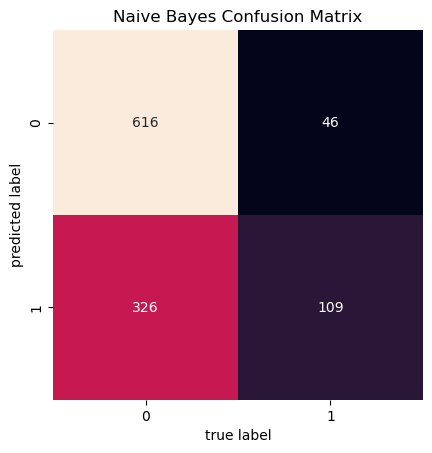

In [25]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(ytest, y_model)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [26]:
print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77       942
           1       0.25      0.70      0.37       155

    accuracy                           0.66      1097
   macro avg       0.59      0.68      0.57      1097
weighted avg       0.83      0.66      0.71      1097



In [27]:
# save model in a pickle format .pkl
import pickle
pickle_out = open("C:/Users/Debbie/Desktop/py/modelHeart.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()